In [1]:
import acquire
import prepare
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [3]:
titanic_df.survived.value_counts(normalize=True)

# For this, baseline prediction is all will perish, because our baseline
# accuracy tells us that we would be 60% chance of being right, because
# data shows 61% perished 

0    0.616162
1    0.383838
Name: survived, dtype: float64

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [4]:
train, validate, test = prepare.prep_titanic_data(titanic_df)
train.head()

/Users/cheese_enchilada/codeup-data-science/classification-exercises/prepare.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [5]:
# create the object
titanic_model = DecisionTreeClassifier(max_depth=3, random_state=123)
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [9]:
titanic_model = titanic_model.fit(X_train, y_train)

[Text(362.7, 332.955, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(181.35, 237.825, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(90.675, 142.695, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(45.3375, 47.565, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(136.0125, 47.565, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(272.025, 142.695, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(226.6875, 47.565, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(317.3625, 47.565, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = 0'),
 Text(544.05, 237.825, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(453.375, 142.695, 'age <= 7.835\ngini = 0.184\nsamples = 205\nvalue = [184, 21]\nclass = 0'),
 Text(408.03749999999997, 47.565, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\

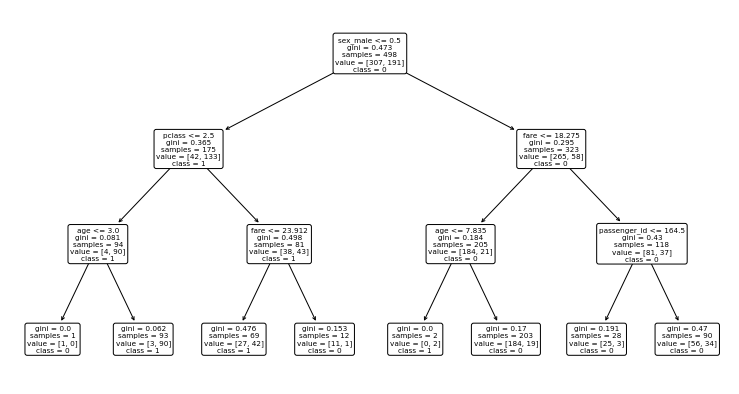

In [11]:
plt.figure(figsize=(13, 7))
plot_tree(titanic_model, feature_names=X_train.columns, class_names=titanic_model.classes_.astype(str), rounded=True)

In [12]:
y_pred = titanic_model.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [13]:
y_pred_proba = titanic_model.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.62222222, 0.37777778],
       [0.62222222, 0.37777778],
       [0.89285714, 0.10714286],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [14]:
# Model Score
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(titanic_model.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [15]:
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [18]:
print(classification_report(y_train, y_pred)) # this is both step 3 and 4

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [24]:
# Run through steps 2-4 using a different max_depth value.
# create the object
titanic_model = DecisionTreeClassifier(max_depth=10, random_state=123)
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived
titanic_model = titanic_model.fit(X_train, y_train)
# only thing changing is max dept from 3 to 10
titanic_model = titanic_model.fit(X_train, y_train)

In [25]:
y_pred = titanic_model.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [26]:
y_pred_proba = titanic_model.predict_proba(X_train)
y_pred_proba[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [27]:
# Model Score
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(titanic_model.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


In [28]:
confusion_matrix(y_train, y_pred)

array([[304,   3],
       [ 15, 176]])

In [29]:
print(classification_report(y_train, y_pred)) # this is both step 3 and 4

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       307
           1       0.98      0.92      0.95       191

    accuracy                           0.96       498
   macro avg       0.97      0.96      0.96       498
weighted avg       0.96      0.96      0.96       498



Which model performs better on your in-sample data? In sample = train set
Second model has 96% accuracy (max length - 10) while First model (max length = 3) 